Chapter 6 Homework:

Create the following visualizations using what we have learned so far in this book and the data from this chapter. Be sure to add titles, axis labels, and legends (where appropriate) to the plots:

    1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami for arthquakes measured with the mb magnitude type.

Text(0.5, 1.0, 'Correlation between earthquake magnitude\nand whether there was a tsunami')

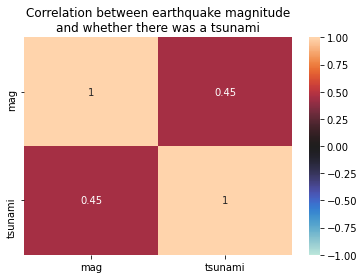

In [11]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

shakes = pd.read_csv('./data/earthquakes.csv')
shakes_query = shakes.query('magType == "mb"')
sns.heatmap(
    shakes_query[['mag', 'tsunami']].corr()
    ,center=0
    ,vmin=-1
    ,vmax=1
    ,annot=True
)
plt.title('Correlation between earthquake magnitude\nand whether there was a tsunami')

    2. Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 − 1.5 × IQR and Q3 + 1.5 × IQR. Be sure to use the quantile() method on the data to make this easier. 

Text(0.5, 0.98, 'Facebook volume traded and closing price with Tukey Fence bounds reference lines')

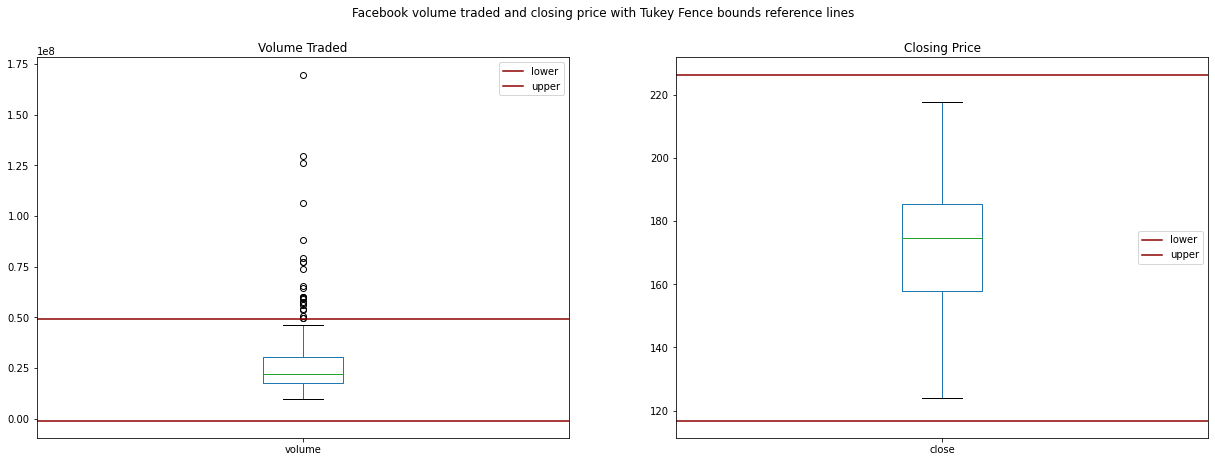

In [32]:
fb = pd.read_csv('./data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)

fb_subset = fb[['volume', 'close']]
quantiles = fb_subset.quantile([0.25, 0.75])
quantiles.loc['iqr', :] = quantiles.loc[0.75,:] - quantiles.loc[0.25,:]
axes = fb_subset.plot(kind='box'
    ,subplots=True
    ,figsize=(21,7)
    ,title=['Volume Traded', 'Closing Price']
)

for ax, col in zip(axes, fb_subset.columns):
    stats = quantiles[col]
    lower = stats.loc[0.25] - 1.5 * stats['iqr']
    upper = stats.loc[0.75] + 1.5 * stats['iqr']
    for bound, name in zip([lower, upper], ['lower', 'upper']):
        ax.axhline(
            bound, 
            color='darkred', 
            
            label=name
        )
        ax.legend()
plt.suptitle('Facebook volume traded and closing price with Tukey Fence bounds reference lines')

    3. Plot the evolution of cumulative COVID-19 cases worldwide, and add a dashed vertical line on the date that it surpassed 1 million. Be sure to format the tick labels on the y-axis accordingly.

In [44]:
covid = pd.read_csv('./data/covid19_cases.csv')
covid = covid.assign(date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y'))
covid.head()
covid = covid.set_index('date').sort_index()
covid.replace('United_States_of_America', 'USA')

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
date,,,,,,,,,,,,
2019-12-31,31/12/2019,31,12,2019,0,0,Belgium,BE,BEL,11455519.0,Europe,NaN
2019-12-31,31/12/2019,31,12,2019,0,0,Mexico,MX,MEX,127575529.0,America,NaN
2019-12-31,31/12/2019,31,12,2019,0,0,Ecuador,EC,ECU,17373657.0,America,NaN
2019-12-31,31/12/2019,31,12,2019,0,0,Russia,RU,RUS,145872260.0,Europe,NaN
2019-12-31,31/12/2019,31,12,2019,0,0,Netherlands,NL,NLD,17282163.0,Europe,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-19,19/09/2020,19,9,2020,77,0,Guinea,GN,GIN,12771246.0,Africa,5.105218
2020-09-19,19/09/2020,19,9,2020,1771,62,Turkey,TR,TUR,82003882.0,Asia,28.358414
2020-09-19,19/09/2020,19,9,2020,28,0,Guinea_Bissau,GW,GNB,1920917.0,Africa,3.019391


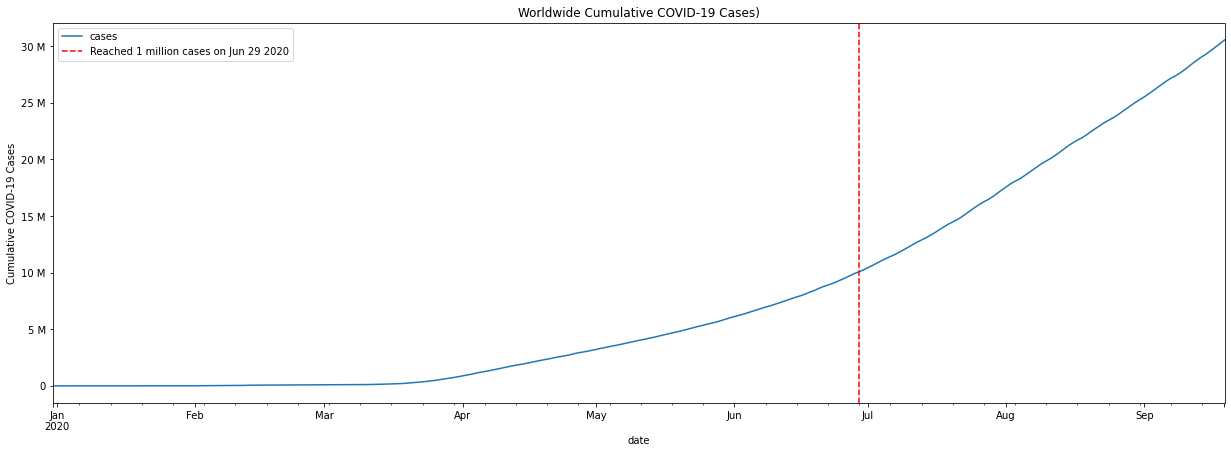

In [57]:
from matplotlib.ticker import EngFormatter

cumul_cases = covid.groupby(pd.Grouper(freq='1D')).sum().cases.cumsum()
axes = cumul_cases.plot(title='Worldwide Cumulative COVID-19 Cases)', figsize=(21, 7))
axes.set_ylabel('Cumulative COVID-19 Cases')
axes.yaxis.set_major_formatter(EngFormatter())

over_one_million  = cumul_cases[cumul_cases >= 10000000].index[0]
axes.axvline(over_one_million, linestyle='dashed', color='r', label=f"Reached 1 million cases on {over_one_million.strftime('%b %d %Y')}")
axes.legend()

    4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.
    

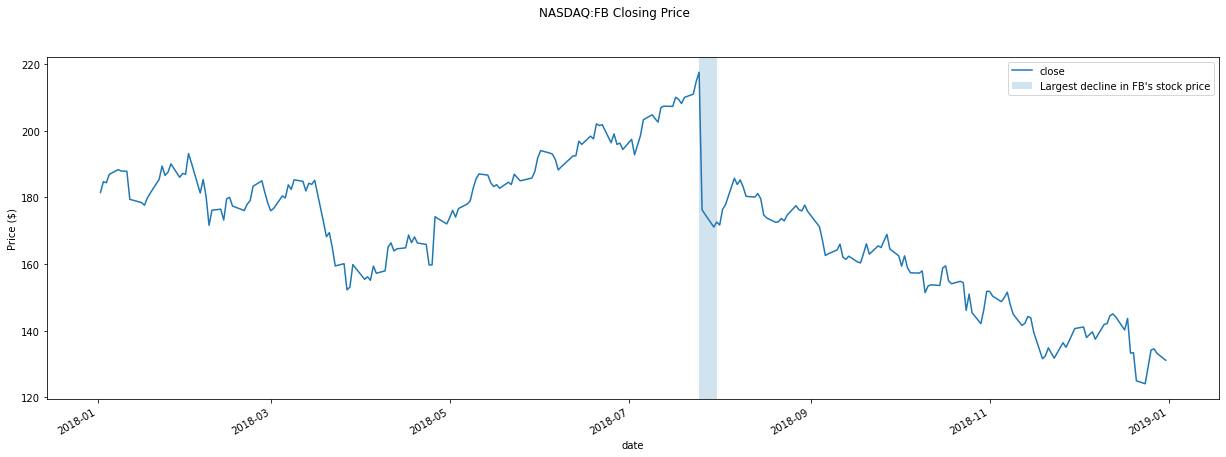

In [63]:
fb.close.plot(kind='line', figsize=(21, 7))
plt.axvspan(
    '2018-07-25', '2018-07-31', alpha=0.2, label='Largest decline in FB\'s stock price',
)
plt.suptitle('NASDAQ:FB Closing Price')
plt.ylabel('Price ($)')
plt.legend()

    5. Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:
        a) Disappointing user growth announced after close on July 25, 2018
        b) Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)
        c) FTC launches investigation on March 20, 2018

Text(0.5, 0.98, 'Facebook Closing Price')

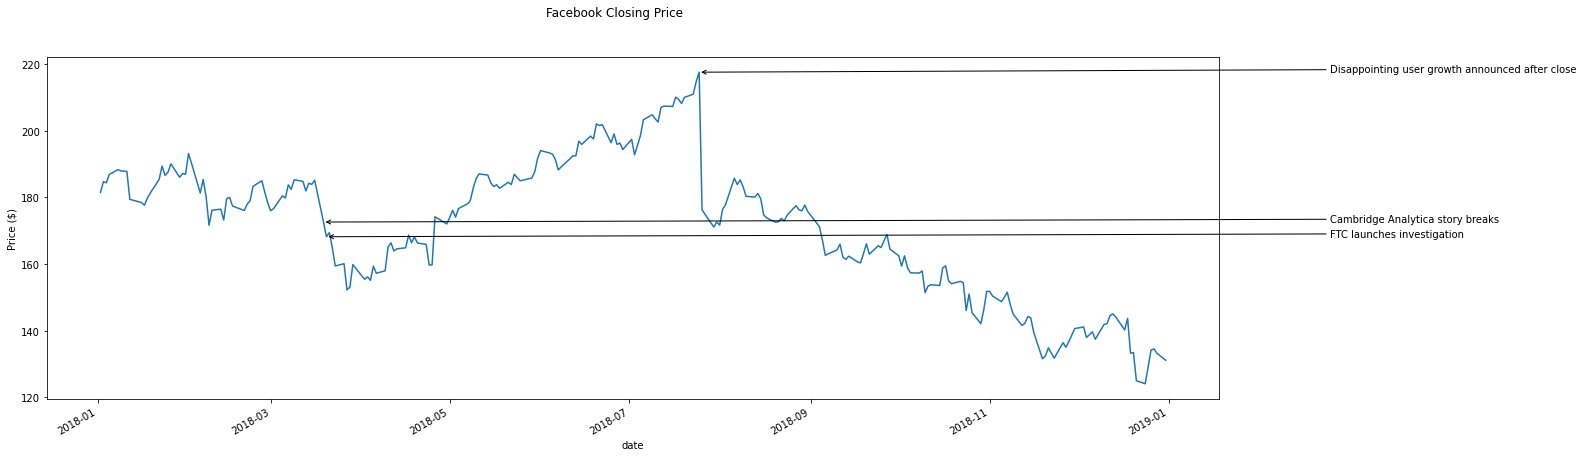

In [78]:
import numpy as np
fb.close.plot(kind='line', figsize=(21, 7))
annotations = [
    ('Disappointing user growth announced after close', '2018-07-25'),
    ('Cambridge Analytica story breaks', '2018-03-19'),
    ('FTC launches investigation', '2018-03-20')
]


for text, date in annotations:
    y_value = fb.close[date]
   
    plt.annotate(
        text, 
        xy=(date, y_value),
        xytext=('2019-02-25', y_value ),
        arrowprops=dict(arrowstyle='->')
    )
plt.ylabel('Price ($)')
plt.suptitle('Facebook Closing Price')


    6. Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.

[<AxesSubplot:xlabel='close', ylabel='volume'>,
 <AxesSubplot:xlabel='close', ylabel='residuals'>,
 <AxesSubplot:xlabel='volume', ylabel='close'>,
 <AxesSubplot:xlabel='volume', ylabel='residuals'>]

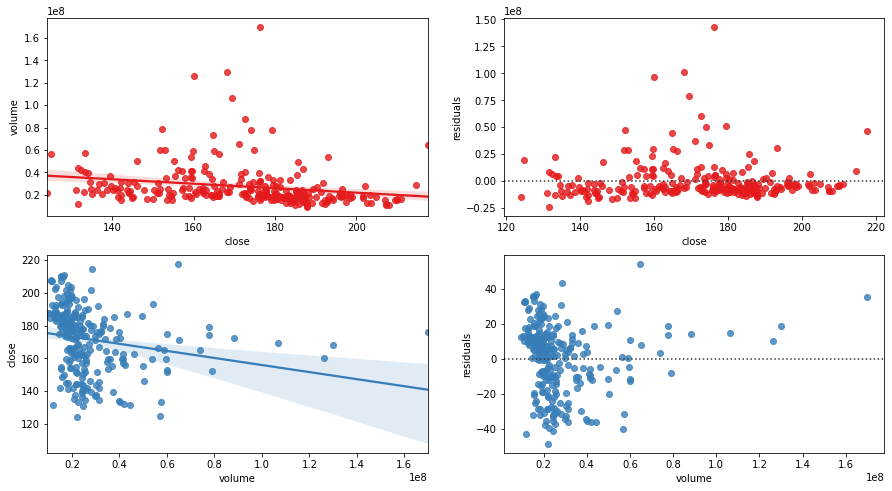

In [102]:
import itertools
from matplotlib import cm

def reg_resid_plots(data):
    """
    Using `seaborn`, plot the regression and residuals plots
    side-by-side for every permutation of 2 columns in data.
    Parameters:
    - data: A `pandas.DataFrame` object
    Returns:
    A matplotlib `Axes` object.
    """
    num_cols = data.shape[1]
    permutation_count = num_cols * (num_cols - 1)
    fig, ax = plt.subplots(permutation_count, 2, figsize=(15, 8))
    for (x, y), axes, color in zip(
        itertools.permutations(data.columns, 2),
        ax,
        [cm.Set1(i) for i in range(len(ax))]
    ):
        for subplot, func in zip(
            axes, (sns.regplot, sns.residplot)
        ):
            func(x=x, y=y, data=data, ax=subplot, color=color)
            if func == sns.residplot:
                subplot.set_ylabel('residuals')
    return fig.axes

reg_resid_plots(fb[['close', 'volume']])